# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Important:** This notebook was AI-generated and has not been fully verified.
Exercise caution when interpreting the code or results.

## Overview

This notebook provides an analysis of Dandiset 001375, which contains data from a pilot study
investigating the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and
neocortical activity. The dataset includes extracellular electrophysiology recordings.

You can find the Dandiset at [https://dandiarchive.org/dandiset/001375](https://dandiarchive.org/dandiset/001375).

## Notebook content

This notebook demonstrates how to:

1.  Load the Dandiset metadata using the DANDI API.
2.  List the assets (files) available in the Dandiset.
3.  Load data from an NWB file and visualize the extracellular electrophysiology data.

## Required Packages

The following packages are required to run this notebook:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

Assume that these are already installed on the user's system.


In [1]:
# Load the Dandiset using the DANDI API
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Load Data from an NWB File

This section demonstrates how to load data from an NWB file within the Dandiset
and visualize the extracellular electrophysiology data. We will use the file
`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

Here's the URL for the asset:
`https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`


In [2]:
# Load the NWB file
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualize Extracellular Electrophysiology Data

This section shows how to load and visualize the extracellular electrophysiology data from the NWB file.

We will plot the first 10 channels for the first 1 second of data.


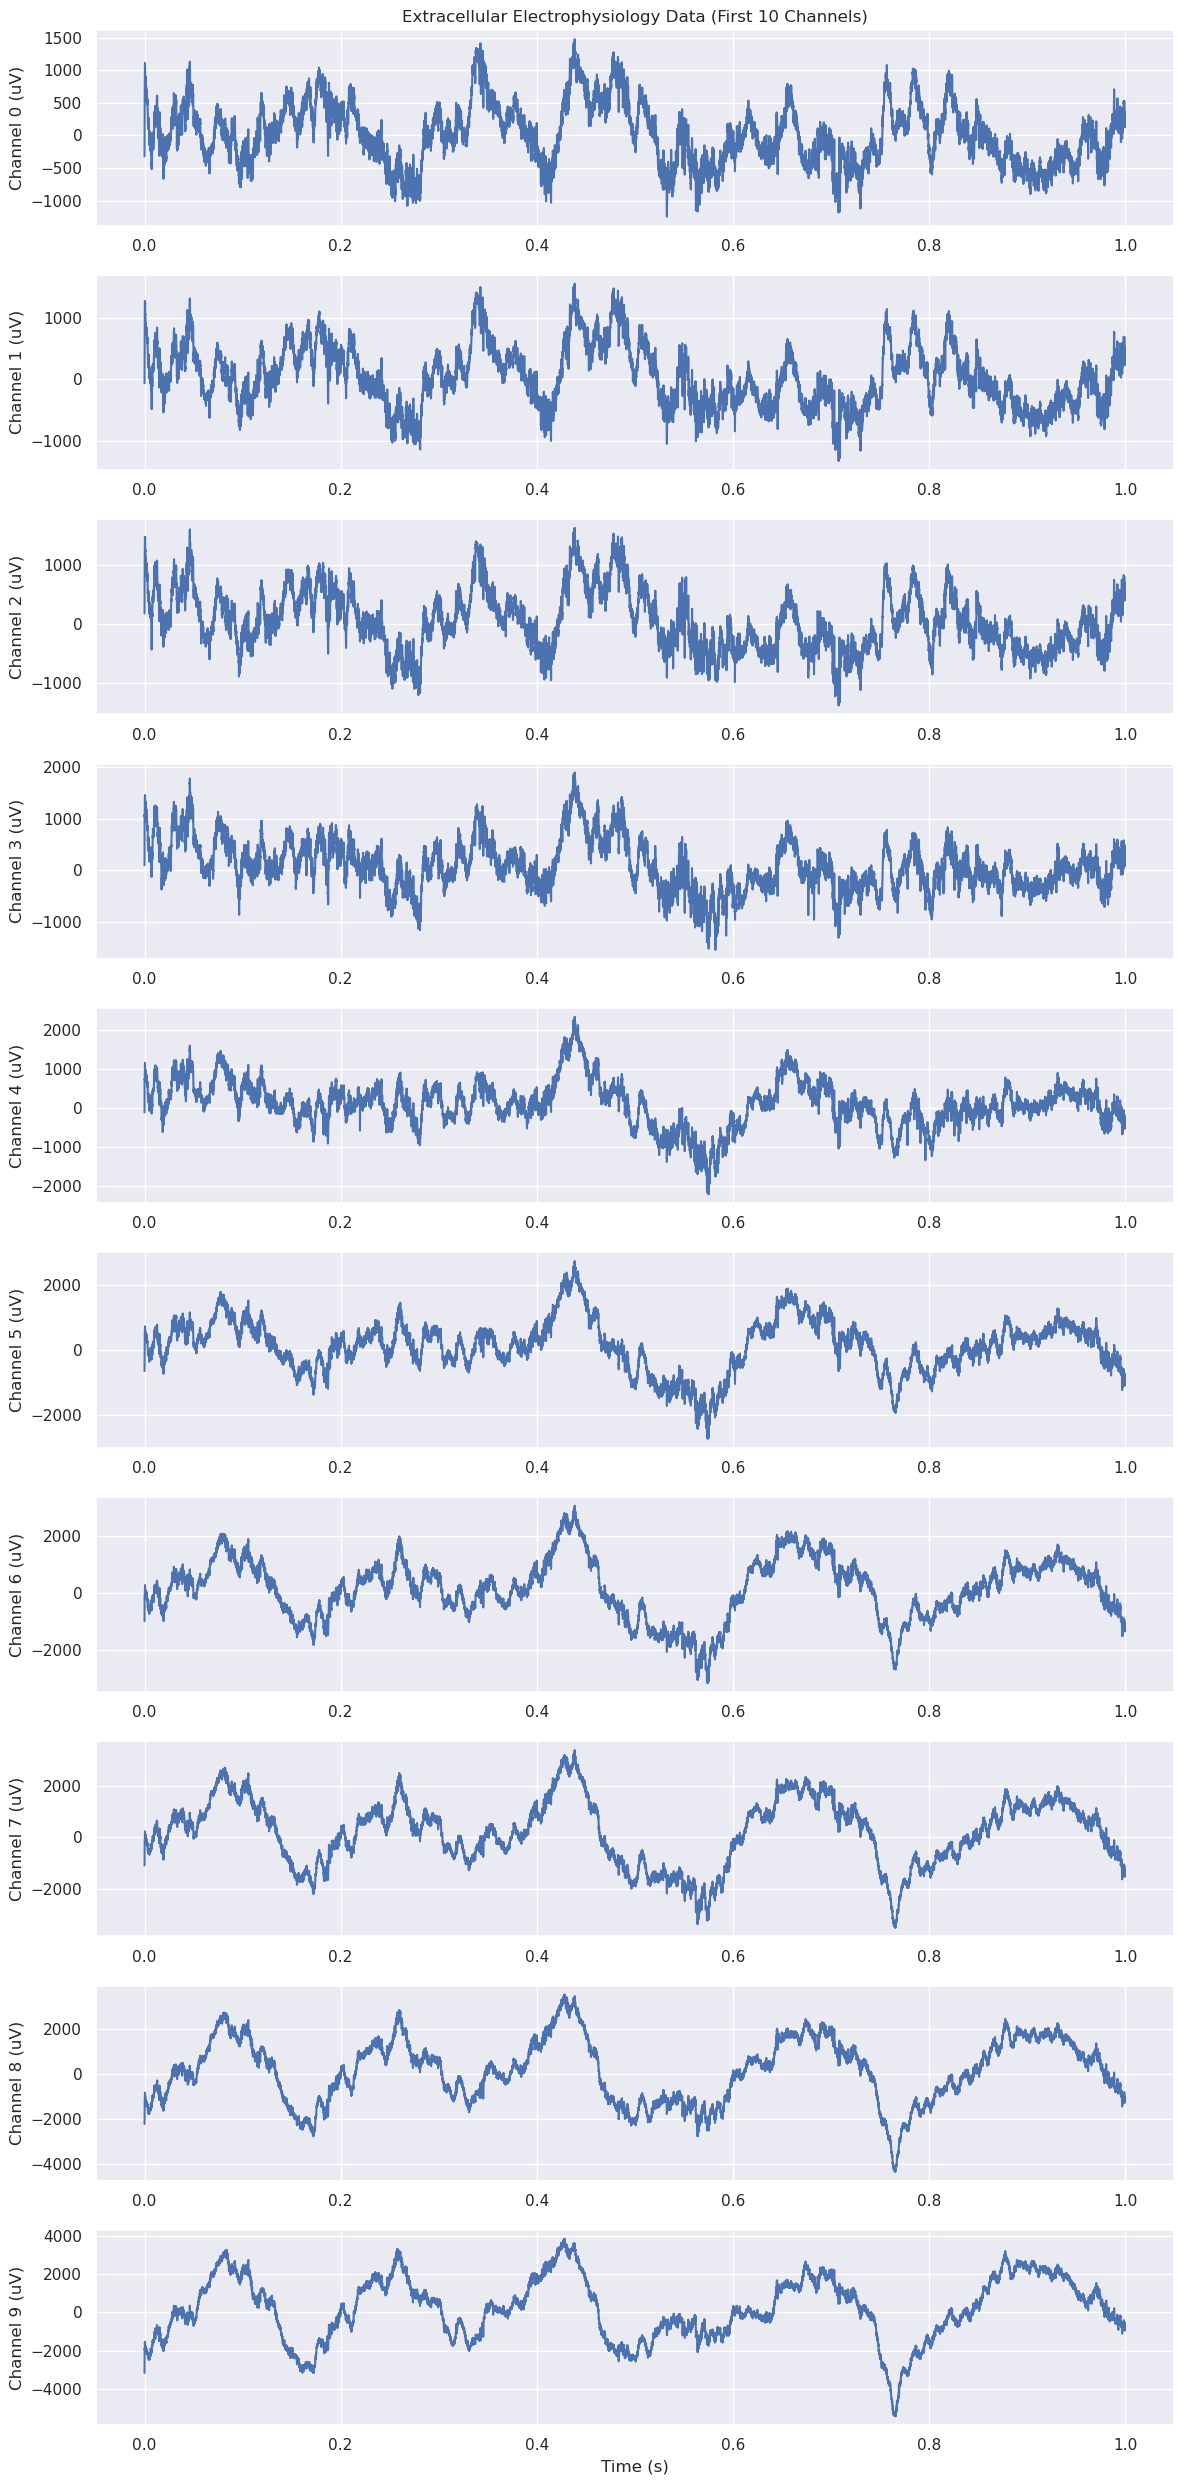

In [3]:
# Get the extracellular electrophysiology data
data = nwb.acquisition["time_series"].data
rate = nwb.acquisition["time_series"].rate

# Plot the first 10 channels for the first 1 second of data
num_channels = min(10, data.shape[1])
duration = 1  # seconds
num_timepoints = int(duration * rate)
fig, axes = plt.subplots(num_channels, 1, figsize=(12, num_channels * 2.5))
for i in range(num_channels):
    channel_data = data[:num_timepoints, i]
    time = np.arange(num_timepoints) / rate
    axes[i].plot(time, channel_data)
    axes[i].set_ylabel(f"Channel {i} (uV)")
axes[0].set_title("Extracellular Electrophysiology Data (First 10 Channels)")
axes[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()

## Summary and Future Directions

This notebook demonstrated how to load and explore data from Dandiset 001375 using the DANDI API and PyNWB.

Possible future directions for analysis include:

*   Exploring other NWB files in the Dandiset.
*   Performing spike sorting on the extracellular electrophysiology data.
*   Analyzing the relationship between septal GABAergic activity and hippocampal and neocortical activity.